## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the whether an inpatient is`Readmitted` within 30 days given info about the encounter.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [ ]:
dataset_path = '/content/'
train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_test = pd.read_csv('/content/test.csv')

print("The shape of the dataset is {}.\n\n".format(train.shape))

train.head()

The shape of the dataset is (71236, 50).




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,197920182,110382426,Caucasian,Female,[80-90),?,3,1,7,5,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,30870324,1276911,Caucasian,Male,[70-80),?,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,126616944,92115693,Caucasian,Female,[70-80),?,3,3,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,303646118,32010471,Caucasian,Male,[50-60),?,6,1,7,7,...,No,No,No,No,No,No,No,No,No,>30
4,109444026,2402271,Caucasian,Male,[40-50),?,1,1,6,2,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [ ]:
train['readmitted'].value_counts()

NO     38405
>30    24881
<30     7950
Name: readmitted, dtype: int64

In [ ]:
train['readmitted'].replace({'NO' : 0, '>30' : 1, '<30' : 2}, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71236 non-null  int64 
 1   patient_nbr               71236 non-null  int64 
 2   race                      71236 non-null  object
 3   gender                    71236 non-null  object
 4   age                       71236 non-null  object
 5   weight                    71236 non-null  object
 6   admission_type_id         71236 non-null  int64 
 7   discharge_disposition_id  71236 non-null  int64 
 8   admission_source_id       71236 non-null  int64 
 9   time_in_hospital          71236 non-null  int64 
 10  payer_code                71236 non-null  object
 11  medical_specialty         71236 non-null  object
 12  num_lab_procedures        71236 non-null  int64 
 13  num_procedures            71236 non-null  int64 
 14  num_medications       

## Baseline model

In [ ]:
df_copy = train.copy()

In [ ]:
df_copy.replace('?', 'missing', inplace= True)

In [ ]:
df_copy.shape

(71236, 50)

In [ ]:
X = df_copy.drop(['readmitted', 'encounter_id'], axis = 1)
X = pd.get_dummies(X)
y = df_copy['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size = 0.2 ,random_state= 42)

In [ ]:
clf = DecisionTreeClassifier(max_depth= 5, random_state= 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score = f1_score(y_val, y_pred, average= 'micro')
print(f'The base line model is DecisionTreeClassifier with score {score}')

The base line model is DecisionTreeClassifier with score 0.5808534531162268


### Data Preprocessing

We've got 71236 examples in the dataset with 48 featues, 1 ID (`encounter_id`), and the labels (`readmitted`).

By looking at the features and a sample from the data, the features are numerical and catogerical types. What about some descriptive statistics?

In [ ]:
train.shape

(71236, 50)

In [ ]:
df_test.shape

(30530, 49)

In [ ]:
df = pd.concat([train , df_test])

In [ ]:
df.replace('?', 'Missing', inplace= True)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,197920182,110382426,Caucasian,Female,[80-90),Missing,3,1,7,5,...,No,No,No,No,No,No,No,Ch,Yes,1.0
1,30870324,1276911,Caucasian,Male,[70-80),Missing,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,0.0
2,126616944,92115693,Caucasian,Female,[70-80),Missing,3,3,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
3,303646118,32010471,Caucasian,Male,[50-60),Missing,6,1,7,7,...,No,No,No,No,No,No,No,No,No,1.0
4,109444026,2402271,Caucasian,Male,[40-50),Missing,1,1,6,2,...,No,Steady,No,No,No,No,No,No,Yes,0.0


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,71236.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.572477
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.684073
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,2.000000


In [ ]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Missing             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

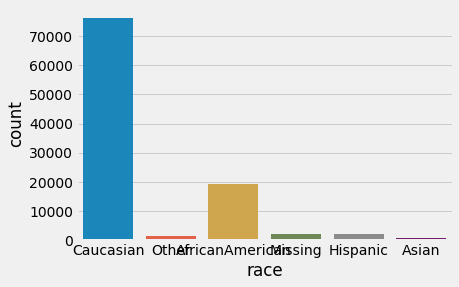

In [ ]:
sns.countplot(df['race'])

<AxesSubplot:xlabel='gender', ylabel='count'>

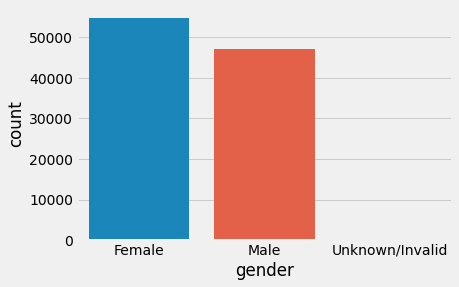

In [ ]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='age'>

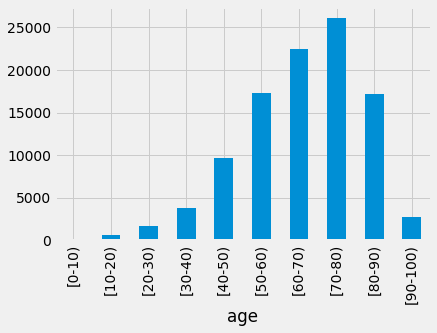

In [ ]:
df.groupby('age').size().plot(kind='bar')

In [ ]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [ ]:
df['age'] = df['age'].map({'[0-10)': 5,
                                    '[10-20)':15,
                                    '[20-30)':25,
                                    '[30-40)': 35,
                                    '[40-50)':45,
                                    '[50-60)': 55,
                                    '[60-70)': 65,
                                    '[70-80)': 75,                         
                                    '[80-90)': 85, 
                                    '[90-100)':95})

In [ ]:
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

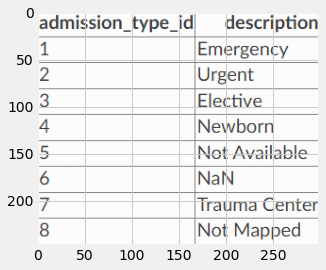

In [ ]:
img = plt.imread('/content/admission type id.PNG')
plt.imshow(img)

In [ ]:
df['admission_type_id'] = df['admission_type_id'].map({ 1 : 'Emergency',
                                                                  2 : 'Emergency',
                                                                  3 : 'Elective',
                                                                  4 : 'Newborn',
                                                                  5 : np.nan,
                                                                  6 : np.nan,
                                                                  7 : 'Emergency',
                                                                  8 : np.nan})

<AxesSubplot:xlabel='admission_type_id', ylabel='count'>

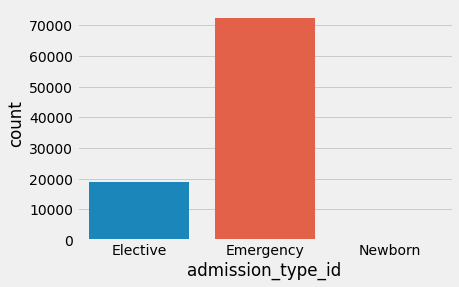

In [ ]:
sns.countplot(df['admission_type_id'])

There are a few of newborn category

In [ ]:
df[df['admission_type_id'] == 'Newborn'][['age','admission_type_id']]

,age,admission_type_id
23053,85,Newborn
30588,55,Newborn
44068,65,Newborn
52806,5,Newborn
57503,75,Newborn
4303,45,Newborn
4813,75,Newborn
6807,85,Newborn
7247,65,Newborn
25264,65,Newborn


In [ ]:
df['admission_type_id'].replace('Newborn', np.nan, inplace = True)
# df.loc[df.admission_type_id == 'Newborn', 'age'] = 5

In [ ]:
sorted(df['discharge_disposition_id'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 27,
 28]

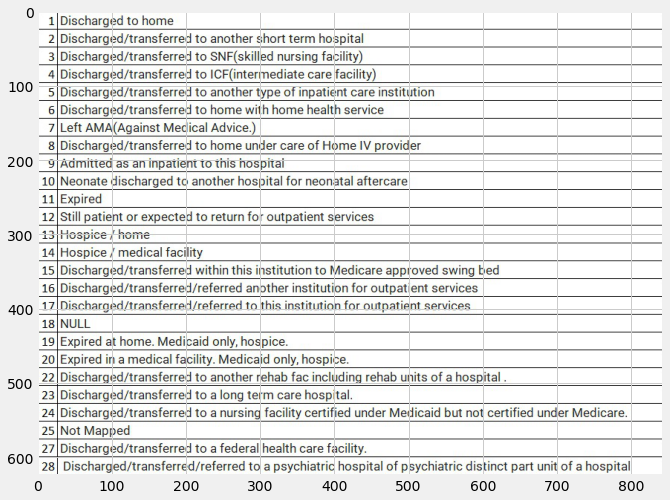

In [ ]:
img = plt.imread('/content/discharge_disposition_id.jpg')
plt.figure(figsize= (10,10))
plt.imshow(img)

In [ ]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].map({ 1 : 'Discharged to home',
                                                                                2 : 'transferred another facility',
                                                                                3 : 'transferred another facility',
                                                                                4 : 'transferred another facility',
                                                                                5 : 'transferred another facility',
                                                                                6 : 'Discharged to home',
                                                                                7 : 'left AMA',
                                                                                8 : 'Discharged to home',
                                                                                9 : 'Discharged to home',
                                                                                10 : 'Neonate discharged',
                                                                                11 : 'Expired',
                                                                                12 : 'Still patient',
                                                                                13 : 'Expired',
                                                                                14 : 'Expired',
                                                                                15 : 'Still patient',
                                                                                16 : 'transferred another facility',
                                                                                17 : 'Still patient',
                                                                                18 : np.nan,
                                                                                19 : 'Expired',
                                                                                20 : 'Expired',
                                                                                22 : 'transferred another facility',
                                                                                23 : 'transferred another facility',
                                                                                24 : 'transferred another facility',
                                                                                25 : np.nan,
                                                                                27 : 'transferred another facility',
                                                                                28 : 'transferred another facility',
})

<AxesSubplot:xlabel='count', ylabel='discharge_disposition_id'>

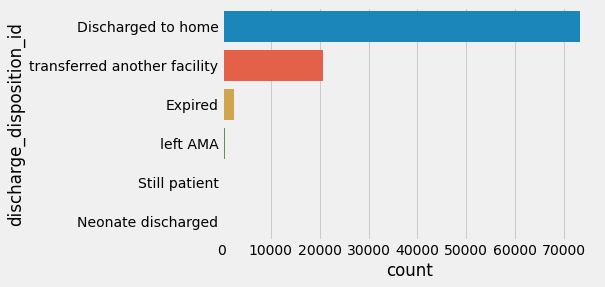

In [ ]:
sns.countplot(data = df ,y = 'discharge_disposition_id')

Neonate discharged your baby is released from hospital care and you can take him home.

In [ ]:
df[df['discharge_disposition_id'] == 'Neonate discharged'][['age','discharge_disposition_id']]

,age,discharge_disposition_id
19397,75,Neonate discharged
20719,95,Neonate discharged
28163,55,Neonate discharged
28634,75,Neonate discharged
37591,65,Neonate discharged
47852,85,Neonate discharged


In [ ]:
df['discharge_disposition_id'].replace('Neonate discharged', np.nan, inplace = True)

In [ ]:
sorted(df['admission_source_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25]

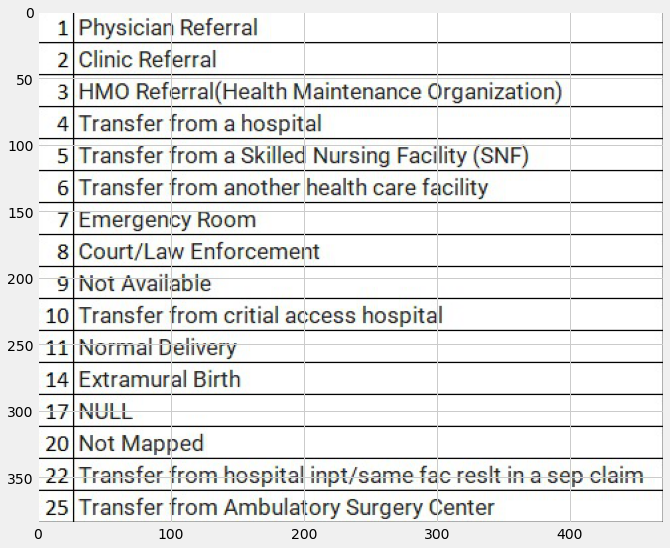

In [ ]:
img = plt.imread('/content/admission_source_id.jpg')
plt.figure(figsize= (10,10))
plt.imshow(img)

Extramural Birth : born outside the hospital

normal delivery : the natural process by which a baby is born from the mother without significant medical intervention.


In [ ]:
df['admission_source_id'] = df['admission_source_id'].map({1 : 'Referral',
                                                           2 : 'Referral',
                                                           3 : 'Referral',
                                                           4 : 'Transfered from facility',
                                                           5 : 'Transfered from facility',
                                                           6 : 'Transfered from facility',
                                                           7 : 'Emergency',
                                                           8 : 'Emergency',
                                                           9 : np.nan,
                                                           10 : 'Transfered from facility',
                                                           11 : 'Delivery',
                                                           14 : 'Delivery',
                                                           17 : np.nan,
                                                           20 : np.nan,
                                                           22 : 'Transfered from facility',
                                                           25 : 'Transfered from facility',
})

<AxesSubplot:xlabel='count', ylabel='admission_source_id'>

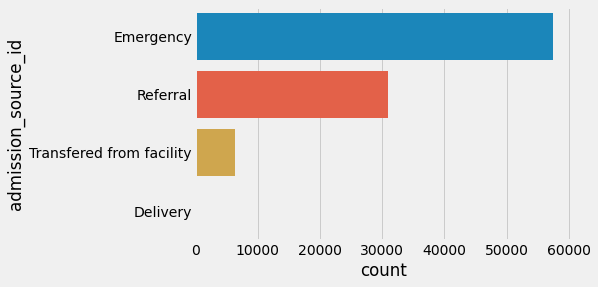

In [ ]:
sns.countplot(data = df ,y = 'admission_source_id')

In [ ]:
df[df.admission_source_id == 'Delivery'][['admission_source_id', 'age', 'gender']]

,admission_source_id,age,gender
20550,Delivery,25,Female
28203,Delivery,75,Female
56798,Delivery,75,Female
7247,Delivery,65,Male


In [ ]:
df['admission_source_id'].replace('Delivery', np.nan, inplace = True)

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

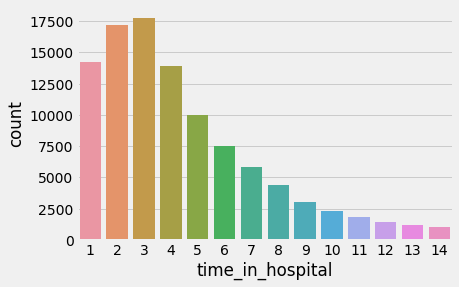

In [ ]:
sns.countplot(df['time_in_hospital'])

In [ ]:
df['payer_code'].value_counts()

Missing    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payer_code, dtype: int64

In [ ]:
df['payer_code'].isnull().sum()

0

In [ ]:
df['medical_specialty'].isnull().sum()

0

<AxesSubplot:xlabel='num_procedures', ylabel='count'>

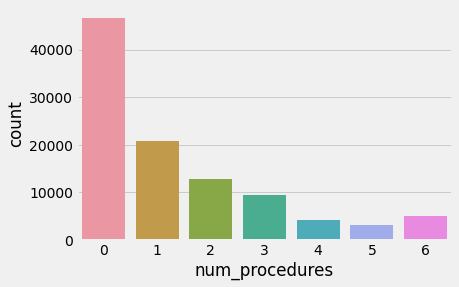

In [ ]:
sns.countplot(df['num_procedures'])

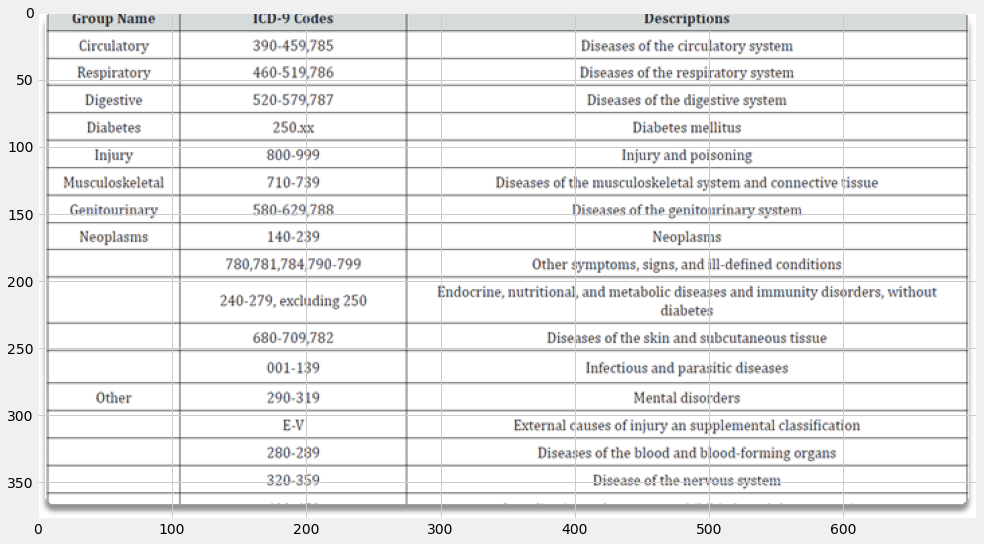

In [ ]:
plt.figure(figsize= (15,15))
img = plt.imread('/content/diag.png')
plt.imshow(img)

In [ ]:
diag = ['diag_1', 'diag_2', 'diag_3']

In [ ]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'

df['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_1']], index=df.index)
df.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

<AxesSubplot:xlabel='max_glu_serum', ylabel='count'>

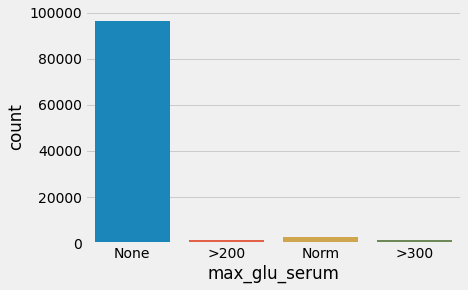

In [ ]:
sns.countplot(df['max_glu_serum'])

In [ ]:
df['max_glu_serum'].replace({'None' : 0, 'Norm' : 1, '>200' : 2, '>300' : 3}, inplace = True)

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

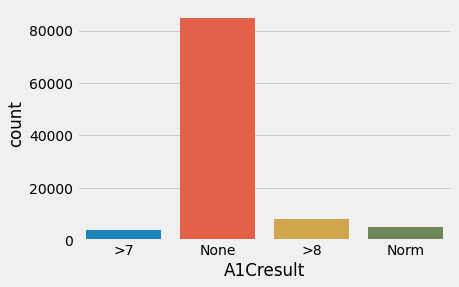

In [ ]:
sns.countplot(df['A1Cresult'])

In [ ]:
df['A1Cresult'].replace({'None' : 0, 'Norm' : 1, '>7' : 2, '>8' : 3}, inplace = True)

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
medications = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [ ]:
for col in medications:
    print('-' * 30, col, '-' * 30)
    print(df[col].value_counts())

------------------------------ metformin ------------------------------
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
------------------------------ repaglinide ------------------------------
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
------------------------------ nateglinide ------------------------------
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
------------------------------ chlorpropamide ------------------------------
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
------------------------------ glimepiride ------------------------------
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
------------------------------ acetohexamide ------------------------------
No        101765
Steady         1
Name: acetohexamide, dtype

In [ ]:
df.drop(columns= ['citoglipton', 'examide'], inplace= True)

In [ ]:
medications = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [ ]:
df[medications] = df[medications].replace(['No', 'Down', 'Steady', 'Up'], [-2, -1 , 0, 1])

<AxesSubplot:xlabel='change', ylabel='count'>

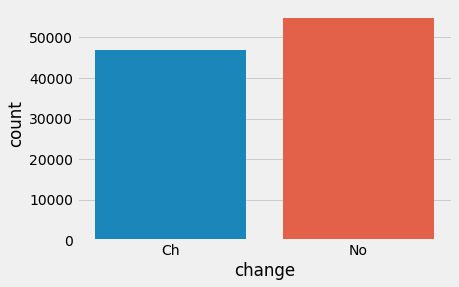

In [ ]:
sns.countplot(df['change'])

In [ ]:
df['change'].replace({'No' : 0, 'Ch' : 1}, inplace = True)

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

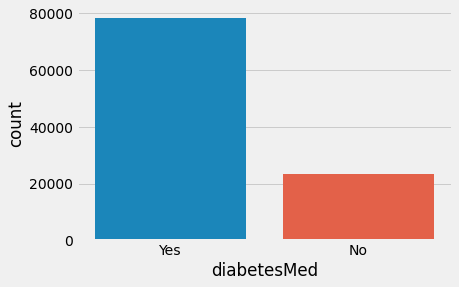

In [ ]:
sns.countplot(df['diabetesMed'])

In [ ]:
df['diabetesMed'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [ ]:
df['readmitted'].value_counts()

0.0    38405
1.0    24881
2.0     7950
Name: readmitted, dtype: int64

In [ ]:
df.drop(columns = ['weight', 'payer_code'], inplace = True)

### Feature Engineering

Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.
- admission type_id and admission source id giving the same information
- we can combine the number of visits of of the patient in the year preceding into one column
- we can count the number of readmitted for each patient
- we can combine the number of procedures
- we can divide medications into diabetes drug classes 
- we can get the number of changes
- we can find if the patient taking more than one type of medication (insulin - pills)

#### Number of readmitted

In [ ]:
num_readmitted = df.groupby(['patient_nbr']).size()

In [ ]:
df = df.merge(num_readmitted.rename('num_readmitted'), on = 'patient_nbr', how = 'left')

#### average number of lab tests, procedures and medications

In [ ]:
total_time_in_hospital = (df.groupby(['patient_nbr', 'time_in_hospital']).size().unstack(fill_value = 0) * sorted(df['time_in_hospital'].unique())).sum(axis = 1)

In [ ]:
total_lab_procedures = (df.groupby(['patient_nbr', 'num_lab_procedures']).size().unstack(fill_value = 0) * sorted(df['num_lab_procedures'].unique())).sum(axis = 1)

In [ ]:
total_procedures = (df.groupby(['patient_nbr', 'num_procedures']).size().unstack(fill_value = 0) * sorted(df['num_procedures'].unique())).sum(axis = 1)

In [ ]:
total_medications = (df.groupby(['patient_nbr', 'num_medications']).size().unstack(fill_value = 0) * sorted(df['num_medications'].unique())).sum(axis = 1)

In [ ]:
avg_tests_medications = total_lab_procedures + total_procedures + total_medications / total_time_in_hospital

In [ ]:
df = df.merge(avg_tests_medications.rename('avg_tests_medications'), on = 'patient_nbr', how = 'left')

#### Average of number of lab tests, and medications per day during the encounter

In [ ]:
df['tests'] = df[['num_lab_procedures', 'num_procedures']].sum(axis = 1)

In [ ]:
total_tests = (df.groupby(['patient_nbr', 'tests']).size().unstack(fill_value = 0) * sorted(df['tests'].unique())).sum(axis = 1)

In [ ]:
df = df.merge(total_tests.rename('total_tests'), on = 'patient_nbr', how = 'left')

In [ ]:
df.drop(columns = 'tests', inplace = True)

#### combine the number of visits of of the patient in the year preceding into one column

In [ ]:
df['Num_of_visits'] = df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis = 1)

In [ ]:
total_num_inpatient = (df.groupby(['patient_nbr', 'number_inpatient']).size().unstack(fill_value = 0) * sorted(df['number_inpatient'].unique())).sum(axis = 1)

In [ ]:
df = df.merge(total_num_inpatient.rename('total_num_inpatient'), on = 'patient_nbr', how = 'left')

#### Average length of stay in hospital

In [ ]:
df = df.merge(total_time_in_hospital.rename('avg_time_in_hospital'), on = 'patient_nbr', how = 'left')

In [ ]:
df['avg_time_in_hospital'] = df['avg_time_in_hospital'] / (df['num_readmitted'])

#### Calculate the patient severity

In [ ]:
df['patient_severity'] = df[['time_in_hospital' , 'num_procedures', 'num_medications', 'num_lab_procedures', 'number_diagnoses', 'age']].sum(axis = 1)

#### Number of times a patient has been admitted under each medical speciality

In [ ]:
InternalMedicine = ['Family/GeneralPractice', 'Cardiology', 'Pulmonology ','Nephrology', 'Dermatology', 'Speech', 'Neurology', 'Neurophysiology',
                    'Endocrinology','Gastroenterology', 'Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases','Oncology',
                    'AllergyandImmunology', 'Endocrinology-Metabolism', 'Rheumatology', 'Pulmonology', 'Obstetrics']

pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric',
              'Pediatrics-AllergyandImmunology', 'Pediatrics-InfectiousDiseases']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']



surgery = ['Surgeon', 'Surgery-Cardiovascular', 'Surgery-Neuro', 'Dentistry', 'Anesthesiology','Pathology', 'Obstetrics', 
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-Maxillofacial', 'Gynecology','Ophthalmology','Otolaryngology','Radiology',
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic', 'Obsterics&Gynecology-GynecologicOnco',
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology', 'Radiologist', 'Proctology', 'SportsMedicine','Perinatology', ]

unknown = ['Resident', 'DCPTEAM', 'PhysicianNotFound', 'OutreachServices']

df['medical_specialty'].replace(InternalMedicine, 'InternalMedicine', inplace = True)
df['medical_specialty'].replace(pediatrics, 'pediatrics', inplace = True)
df['medical_specialty'].replace(psychic, 'psychic', inplace = True)
df['medical_specialty'].replace(surgery, 'surgery', inplace = True)
df['medical_specialty'].replace(unknown, 'Resident', inplace = True)


In [ ]:
specialty_counts = df.groupby(['patient_nbr', 'medical_specialty']).size().unstack(fill_value = 0)

In [ ]:
specialty_counts.drop(columns = 'Missing', inplace= True)

In [ ]:
df = df.merge(specialty_counts, on = 'patient_nbr', how = 'left')

In [ ]:
df.drop(columns = 'medical_specialty', inplace = True)

#### divide medications into diabetes drug classes

In [ ]:
pills_med = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
              'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
              'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [ ]:
Biguanides = ['metformin', 'metformin-rosiglitazone', 
                'metformin-pioglitazone', 'glyburide-metformin', 'glipizide-metformin']
              
Sulfonylureas = ['acetohexamide', 'tolbutamide', 'tolazamide', 'chlorpropamide', 'glipizide', 'glyburide', 'glimepiride', 
                 'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone']

Thiazolidinediones = ['pioglitazone', 'rosiglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 
                      'troglitazone', 'glimepiride-pioglitazone']

Meglitinides = ['repaglinide',  'nateglinide']

Alpha_glucosidase = ['acarbose','miglitol']

In [ ]:
df['Biguanides'] = -2
df['Sulfonylureas'] = -2
df['Thiazolidinediones'] = -2
df['Meglitinides'] = -2
df['Alpha_glucosidase'] = -2

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
for row in range(df.shape[0]):
  for col in Biguanides:
    if df.loc[row, col] != -2:
      df.loc[row, 'Biguanides'] = df.loc[row, col]
      continue

In [ ]:
for row in range(df.shape[0]):
  for col in Sulfonylureas:
    if df.loc[row, col] != -2:
      df.loc[row, 'Sulfonylureas'] = df.loc[row, col]
      continue

In [ ]:
for row in range(df.shape[0]):
  for col in Thiazolidinediones:
    if df.loc[row, col] != -2:
      df.loc[row, 'Thiazolidinediones'] = df.loc[row, col]
      continue

In [ ]:
for row in range(df.shape[0]):
  for col in Meglitinides:
    if df.loc[row, col] != -2:
      df.loc[row, 'Meglitinides'] = df.loc[row, col]
      continue

In [ ]:
for row in range(df.shape[0]):
  for col in Alpha_glucosidase:
    if df.loc[row, col] != -2:
      df.loc[row, 'Alpha_glucosidase'] = df.loc[row, col]
      continue

In [ ]:
df.drop(columns = pills_med, inplace = True)

In [ ]:
medications = ['Biguanides', 'Sulfonylureas', 'Thiazolidinediones', 'Meglitinides', 'Alpha_glucosidase', 'insulin']

In [ ]:
for col in medications:
    print('-' * 30, col, '-' * 30)
    print(df[col].value_counts())

------------------------------ Biguanides ------------------------------
-2    81122
 0    18994
 1     1072
-1      578
Name: Biguanides, dtype: int64
------------------------------ Sulfonylureas ------------------------------
-2    72820
 0    25761
 1     1878
-1     1307
Name: Sulfonylureas, dtype: int64
------------------------------ Thiazolidinediones ------------------------------
-2    88113
 0    13040
 1      409
-1      204
Name: Thiazolidinediones, dtype: int64
------------------------------ Meglitinides ------------------------------
-2    99533
 0     2043
 1      134
-1       56
Name: Meglitinides, dtype: int64
------------------------------ Alpha_glucosidase ------------------------------
-2    101421
 0       325
 1        12
-1         8
Name: Alpha_glucosidase, dtype: int64
------------------------------ insulin ------------------------------
-2    47383
 0    30849
-1    12218
 1    11316
Name: insulin, dtype: int64


#### get the number of changes in medication

In [ ]:
for row in range(df.shape[0]):
  changes = 0
  for col in medications:
    if abs(df.loc[row, col]) == 1:
      changes += 1
  df.loc[row, 'change'] = changes

#### find if the patient taking more than one type of medication pills (any - some - all)

In [ ]:
df['combo_medication'] = 'any'

for row in range(df.shape[0]):
  num_med = 0
  for col in medications:
    if df.loc[row, col] != -2:
      num_med += 1

  if num_med > 0 and  num_med < 5 :
    df.loc[row, 'combo_medication'] = 'some'

  elif num_med == 5:
    df.loc[row, 'combo_medication'] = 'all'

#### Blood sugar control

In [ ]:
df['Blood_sugar_control'] = df['A1Cresult'] + df['max_glu_serum']

In [ ]:
Blood_sugar_control = (df.groupby(['patient_nbr', 'Blood_sugar_control']).size().unstack(fill_value = 0) * sorted(df['Blood_sugar_control'].unique())).var(axis = 1)

In [ ]:
df.drop(columns = 'Blood_sugar_control', inplace = True)

In [ ]:
df = df.merge(Blood_sugar_control.rename('Blood_sugar_control'), on = 'patient_nbr', how = 'left')

In [ ]:
Emergency = df.groupby(['patient_nbr', 'admission_source_id']).size().unstack(fill_value = 0)['Emergency']

#### Feature Selection

In [ ]:
import scipy.stats as stats

#Statistical Tests (Chi Square and Anova)
p_val = []
sig = []
for i in df.columns:
    if i in numerical_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i], df[df['readmitted'] == 2][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
41,Blood_sugar_control,0.000000e+00,Significant
23,num_readmitted,0.000000e+00,Significant
24,avg_tests_medications,0.000000e+00,Significant
25,total_tests,0.000000e+00,Significant
14,number_inpatient,0.000000e+00,Significant
27,total_num_inpatient,0.000000e+00,Significant
26,Num_of_visits,0.000000e+00,Significant
30,InternalMedicine,0.000000e+00,Significant
34,surgery,0.000000e+00,Significant
6,discharge_disposition_id,0.000000e+00,Significant


### Split Data

In [ ]:
train = df.iloc[:train.shape[0], :]
X_test = df.iloc[train.shape[0]:, :]

In [ ]:
train = train.sample(frac = 1)

In [ ]:
train.drop(columns= ['encounter_id', 'patient_nbr'], inplace= True)

In [ ]:
X = train.drop(columns = 'readmitted')
X = pd.get_dummies(X)
y = train['readmitted']

In [ ]:
X.shape

(71236, 56)

In [ ]:
X_test_dum = pd.get_dummies(X_test)

In [ ]:
X_test_dum.shape

(30530, 59)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size = 0.2 ,stratify= y, random_state= 42)

### Model Selection

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.9 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#### Train on imbalanced data

In [ ]:
y_train.value_counts()

0.0    30724
1.0    19904
2.0     6360
Name: readmitted, dtype: int64

In [ ]:
result_dict = {}

In [ ]:
lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["LGBMClassifier Train Score"] = accuracies.mean()

In [ ]:
GB = GradientBoostingClassifier()
accuracies = cross_val_score(GB, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["GradientBoostingClassifier Train Score"] = accuracies.mean()

In [ ]:
HG = HistGradientBoostingClassifier(loss= 'categorical_crossentropy')
accuracies = cross_val_score(HG, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["HistGradientBoostingClassifier Train Score"] = accuracies.mean()

In [ ]:
RF = RandomForestClassifier(max_depth= 5)
accuracies = cross_val_score(RF, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["RandomForestClassifier Train Score"] = accuracies.mean()

In [ ]:
XGB = XGBClassifier(max_depth = 5)
accuracies = cross_val_score(XGB, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["XGBClassifier Train Score"] = accuracies.mean()

In [ ]:
CT = CatBoostClassifier(loss_function='MultiClass')
accuracies = cross_val_score(CT, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["CatBoostClassifier Train Score"] = accuracies.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.8727399	total: 257ms	remaining: 51.1s
5:	learn: 0.8461151	total: 306ms	remaining: 50.7s
6:	learn: 0.8255962	total: 361ms	remaining: 51.2s
7:	learn: 0.8071150	total: 419ms	remaining: 51.9s
8:	learn: 0.7922067	total: 470ms	remaining: 51.8s
9:	learn: 0.7786566	total: 521ms	remaining: 51.6s
10:	learn: 0.7680924	total: 575ms	remaining: 51.7s
11:	learn: 0.7570737	total: 630ms	remaining: 51.9s
12:	learn: 0.7489935	total: 687ms	remaining: 52.2s
13:	learn: 0.7410639	total: 750ms	remaining: 52.8s
14:	learn: 0.7335498	total: 794ms	remaining: 52.1s
15:	learn: 0.7281548	total: 847ms	remaining: 52.1s
16:	learn: 0.7228511	total: 897ms	remaining: 51.9s
17:	learn: 0.7182710	total: 951ms	remaining: 51.9s
18:	learn: 0.7139645	total: 1s	remaining: 51.7s
19:	learn: 0.7113738	total: 1.06s	remaining: 52.2s
20:	learn: 0.7073049	total: 1.11s	remaining: 52s
21:	learn: 0.7031831	total: 1.16s	remaining: 51.7s
22:	learn: 0.6991360	total: 1.21s	remainin

In [ ]:
Ab = AdaBoostClassifier()
accuracies = cross_val_score(Ab, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["AdaBoostClassifier Train Score"] = accuracies.mean()

In [ ]:
estimator = []
estimator.append(('lgbm', LGBMClassifier(max_depth= 5)))
estimator.append(('HG', HistGradientBoostingClassifier(max_depth= 5)))
estimator.append(('GB', GradientBoostingClassifier(max_depth= 5)))
estimator.append(('XGB', XGBClassifier(max_depth= 5)))
estimator.append(('CAT', CatBoostClassifier(max_depth= 5)))
VC = VotingClassifier(estimators= estimator, voting= 'soft')

accuracies = cross_val_score(VC, X, y, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
result_dict["VotingClassifier Train Score"] = accuracies.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.8736304	total: 232ms	remaining: 46.1s
5:	learn: 0.8501524	total: 274ms	remaining: 45.4s
6:	learn: 0.8286277	total: 319ms	remaining: 45.2s
7:	learn: 0.8104111	total: 365ms	remaining: 45.2s
8:	learn: 0.7957941	total: 409ms	remaining: 45.1s
9:	learn: 0.7821840	total: 472ms	remaining: 46.7s
10:	learn: 0.7706916	total: 515ms	remaining: 46.3s
11:	learn: 0.7598184	total: 558ms	remaining: 45.9s
12:	learn: 0.7509511	total: 602ms	remaining: 45.7s
13:	learn: 0.7428125	total: 642ms	remaining: 45.2s
14:	learn: 0.7361829	total: 691ms	remaining: 45.3s
15:	learn: 0.7302342	total: 730ms	remaining: 44.9s
16:	learn: 0.7254414	total: 775ms	remaining: 44.8s
17:	learn: 0.7194769	total: 817ms	remaining: 44.6s
18:	learn: 0.7159700	total: 861ms	remaining: 44.5s
19:	learn: 0.7121738	total: 905ms	remaining: 44.3s
20:	learn: 0.7098296	total: 943ms	remaining: 44s
21:	learn: 0.7071121	total: 980ms	remaining: 43.6s
22:	learn: 0.7036759	total: 1.03s	remai

In [ ]:
df_result = pd.DataFrame.from_dict(result_dict,orient = "index", columns=["Score"])
df_result.sort_values(by = 'Score', ascending=False)

,Score
VotingClassifier Train Score,0.733637
LGBMClassifier Train Score,0.733604
HistGradientBoostingClassifier Train Score,0.732518
CatBoostClassifier Train Score,0.731147
XGBClassifier Train Score,0.730796
GradientBoostingClassifier Train Score,0.728620
RandomForestClassifier Train Score,0.710483
AdaBoostClassifier Train Score,0.689918


#### Autogluon

In [ ]:
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
hyperparameters = {      
                   'GBM' : {}
                  } 

In [ ]:
predictor = TabularPredictor(label = 'readmitted', problem_type='multiclass', eval_metric= 'f1_micro').fit(train_data = pd.concat([X,y], axis = 1),
                                                                                                  presets="best_quality",
                                                                                                  hyperparameters=hyperparameters,
                                                                                                  )

No path specified. Models will be saved in: "AutogluonModels/ag-20230315_175835/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230315_175835/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    71236
Train Data Columns: 56
Label Column: readmitted
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10350.36 MB
	Train Data (Original)  Memory Usage: 20.94 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenera

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBM_BAG_L1   0.734629       4.614633  109.900713                4.614633         109.900713            1       True          1
1  WeightedEnsemble_L2   0.734629       4.647393  109.936442                0.032760           0.035728            2       True          2
2      LightGBM_BAG_L2   0.734586       6.163393  183.004064                1.548761          73.103351            2       True          3
3  WeightedEnsemble_L3   0.734586       6.205251  183.048100                0.041858           0.044036            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, sp

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': 0.7346285585939694,
  'WeightedEnsemble_L2': 0.7346285585939694,
  'LightGBM_BAG_L2': 0.7345864450558707,
  'WeightedEnsemble_L3': 0.7345864450558707},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1': 'AutogluonModels/ag-20230315_144436/models/LightGBM_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230315_144436/models/WeightedEnsemble_L2/',
  'LightGBM_BAG_L2': 'AutogluonModels/ag-20230315_144436/models/LightGBM_BAG_L2/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20230315_144436/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'LightGBM_BAG_L1': 109.9007134437561,
  'WeightedEnsemble_L2': 0.03572821617126465,
  'LightGBM_BAG_L2': 73.10335087776184,
  'WeightedEnsemble_L3': 0.04403567314147949}

<AxesSubplot:xlabel='model'>

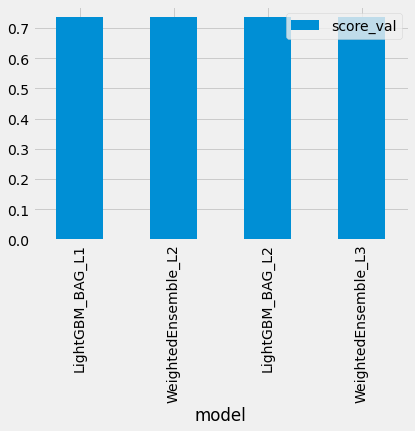

In [ ]:
predictor.leaderboard(silent=True).plot(kind = 'bar', x = 'model', y = 'score_val')


#### Undersampling the majority class

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
result_dict_undersamplingtrain = {}
result_dict_undersamplingval = {}

In [ ]:
undersample = TomekLinks()
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["TomekLinks Train Score"] = accuracies.mean()
result_dict_undersamplingval["TomekLinks val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = EditedNearestNeighbours(n_neighbors=3, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["EditedNearestNeighbours Train Score"] = accuracies.mean()
result_dict_undersamplingval["EditedNearestNeighbours val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = RandomUnderSampler(sampling_strategy= {0 : 15000, 1 : 15000})
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["RandomUnderSampler Train Score"] = accuracies.mean()
result_dict_undersamplingval["RandomUnderSampler val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["OneSidedSelection Train Score"] = accuracies.mean()
result_dict_undersamplingval["OneSidedSelection val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5, sampling_strategy= 'not minority')
X_res, y_res = undersample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_undersamplingtrain["NeighbourhoodCleaningRule Train Score"] = accuracies.mean()
result_dict_undersamplingval["NeighbourhoodCleaningRule val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_train_undersampling = pd.DataFrame.from_dict(result_dict_undersamplingtrain,orient = "index", columns=["Score"])
df_train_undersampling.sort_values(by = 'Score', ascending=False)

,Score
EditedNearestNeighbours Train Score,0.844179
NeighbourhoodCleaningRule Train Score,0.788739
TomekLinks Train Score,0.741915
OneSidedSelection Train Score,0.729765
RandomUnderSampler Train Score,0.667318


In [ ]:
df_val_undersampling = pd.DataFrame.from_dict(result_dict_undersamplingval,orient = "index",columns=["Score"])
df_val_undersampling.sort_values(by = 'Score', ascending=False)

,Score
TomekLinks val Score,0.726628
OneSidedSelection val Score,0.726418
RandomUnderSampler val Score,0.722628
NeighbourhoodCleaningRule val Score,0.686342
EditedNearestNeighbours val Score,0.598681


#### Oversampling the manority class

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
result_dict_oversamplingtrain = {}
result_dict_oversamplingval = {}

In [ ]:
oversample = ADASYN(sampling_strategy= 'not majority')
X_res, y_res = oversample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_oversamplingtrain["ADASYN Train Score"] = accuracies.mean()
result_dict_oversamplingval["ADASYN val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
oversample = SMOTE(sampling_strategy= 'not majority')
X_res, y_res = oversample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_dict_oversamplingtrain["SMOTE Train Score"] = accuracies.mean()
result_dict_oversamplingval["SMOTE val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_train_oversampling = pd.DataFrame.from_dict(result_dict_oversamplingtrain,orient = "index", columns=["Score"])
df_train_oversampling.sort_values(by = 'Score', ascending=False)

,Score
ADASYN Train Score,0.741296
SMOTE Train Score,0.739133


In [ ]:
df_val_oversampling = pd.DataFrame.from_dict(result_dict_oversamplingval,orient = "index", columns=["Score"])
df_val_oversampling.sort_values(by = 'Score', ascending=False)

,Score
SMOTE val Score,0.724102
ADASYN val Score,0.723189


#### Combination of Oversampling and Undersampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

In [ ]:
result_combineresample_dict_train = {}
result_combineresample_dict_val = {}

In [ ]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy= 'not minority'))
X_res, y_res = resample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_combineresample_dict_train["SMOTETomek Train Score"] = accuracies.mean()
result_combineresample_dict_val["SMOTETomek val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
resample = SMOTEENN(enn=EditedNearestNeighbours())
X_res, y_res = resample.fit_resample(X_train, y_train)

lgbm = LGBMClassifier()
accuracies = cross_val_score(lgbm, X_res, y_res, cv= RepeatedStratifiedKFold(n_repeats= 3), scoring='f1_micro')
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_val)
result_combineresample_dict_train["SMOTEENN Train Score"] = accuracies.mean()
result_combineresample_dict_val["SMOTEENN val Score"] = f1_score(y_val, y_pred, average= 'micro')

In [ ]:
df_combineresample_train = pd.DataFrame.from_dict(result_combineresample_dict_train, orient = "index", columns=["Score"])
df_combineresample_train.sort_values(by = 'Score', ascending=False)

,Score
SMOTEENN Train Score,0.828930
SMOTETomek Train Score,0.744576


In [ ]:
df_combineresample_val = pd.DataFrame.from_dict(result_combineresample_dict_val, orient = "index", columns=["Score"])
df_combineresample_val.sort_values(by = 'Score', ascending=False)

,Score
SMOTETomek val Score,0.721364
SMOTEENN val Score,0.653706


### Hyperparameter tuning

#### RandomForest tuning

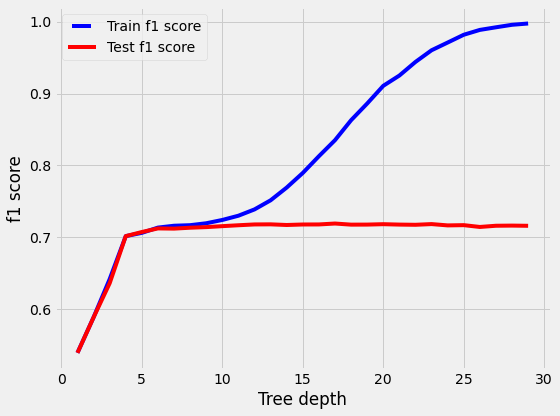

In [ ]:
max_depths = np.arange(1, 30)
train_results = []
test_results = []
for max_depth in max_depths:
   Rf = RandomForestClassifier(max_depth = max_depth)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(max_depths, train_results, 'b', label='Train f1 score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree depth')
plt.tight_layout()


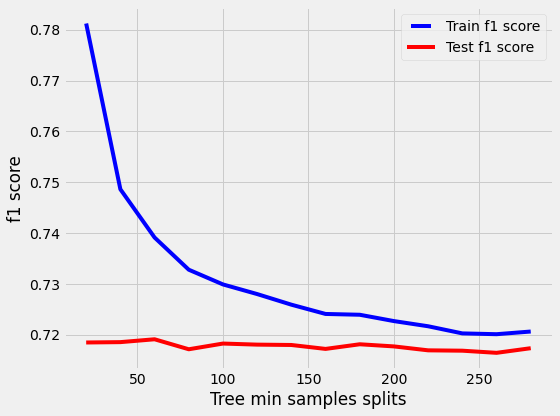

In [ ]:
min_samples_splits = np.arange(20, 300, 20)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   Rf = RandomForestClassifier(min_samples_split=min_samples_split)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train f1 score')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min samples splits')
plt.tight_layout()

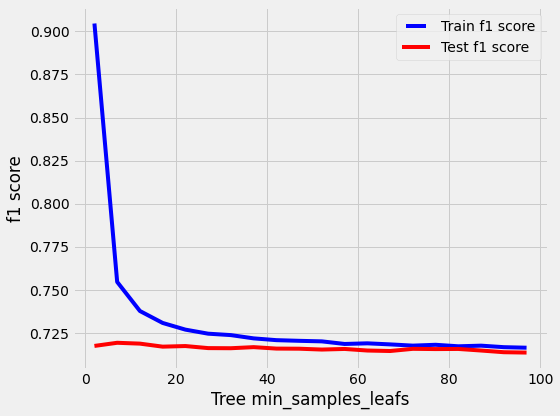

In [ ]:
min_samples_leafs = np.arange(2, 100, 5)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   Rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train f1 score')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min_samples_leafs')
plt.tight_layout()

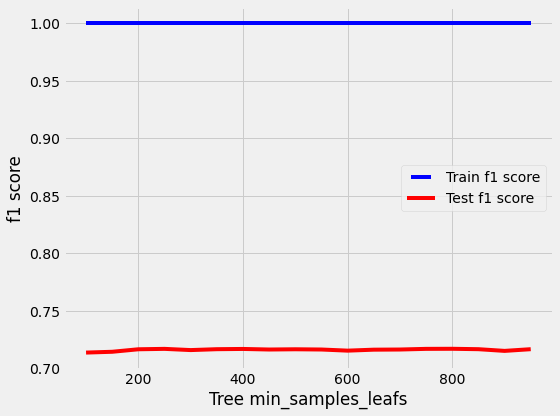

In [ ]:
n_estimators = np.arange(100, 1000, 50)
train_results = []
test_results = []
for n_estimator in n_estimators:
   Rf = RandomForestClassifier(n_estimators = n_estimator)
   Rf.fit(X_train, y_train)
   train_pred = Rf.predict(X_train)
   score = f1_score(y_train, train_pred, average= 'micro')
   train_results.append(score)

   y_pred = Rf.predict(X_val)
   score = f1_score(y_val, y_pred, average= 'micro')
   test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train f1 score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test f1 score')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('f1 score')
plt.xlabel('Tree min_samples_leafs')
plt.tight_layout()

In [ ]:
from sklearn.model_selection  import GridSearchCV
#from sklearn.metrics import make_scorer

clf = RandomForestClassifier()

parameters = {"max_depth" : [5,6,7], "min_samples_leaf" : [70,75,80], 
             "min_samples_split" : [50, 60, 200, 250]}

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats= 3)
grid = GridSearchCV(estimator = clf, param_grid = parameters,scoring =  'f1_micro', n_jobs= -1, cv= cv, verbose= 1)

grid_fit = grid.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

y_train_pred = best_clf.predict(X_train)
y_val_pred = best_clf.predict(X_val)

print("Optimized Model\n------")
print("Final F-score on the train data: {:.4f}".format(f1_score(y_train, y_train_pred, average= 'micro')))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_val, y_val_pred, average= 'micro')))

Fitting 15 folds for each of 36 candidates, totalling 540 fits
Optimized Model
------
Final F-score on the train data: 0.7137
Final F-score on the testing data: 0.7131


#### LGBMClassifier

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.4 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler

In [ ]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 3,
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 500),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = LGBMClassifier(**param)
    gbm.fit(X_train, y_train)
    preds = gbm.predict(X_val)
    accuracy = f1_score(y_val, preds, average= 'micro')
    return accuracy

In [ ]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials= 1000, timeout= 7200, n_jobs= -1)

[I 2023-03-15 15:34:41,945] A new study created in memory with name: lightgbm
[I 2023-03-15 15:35:16,232] Trial 33 finished with value: 0.7366647950589558 and parameters: {'n_estimators': 432, 'max_depth': 17, 'learning_rate': 0.01773721464729221, 'reg_alpha': 0.0018640500174251376, 'reg_lambda': 2.292980501186319, 'colsample_bytree': 0.4, 'min_data_per_groups': 17, 'lambda_l1': 1.3380510773552482e-06, 'lambda_l2': 1.6647636136444592, 'num_leaves': 340, 'feature_fraction': 0.5952475933850792, 'bagging_fraction': 0.8211762906207106, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 30 with value: 0.7376473891072433.
[I 2023-03-15 15:36:29,628] Trial 1 finished with value: 0.7349101628298709 and parameters: {'n_estimators': 467, 'max_depth': 7, 'learning_rate': 0.047318921513851524, 'reg_alpha': 8.157053828562887, 'reg_lambda': 0.007626280001629406, 'colsample_bytree': 0.5, 'min_data_per_groups': 12, 'lambda_l1': 1.9444905666757035e-08, 'lambda_l2': 0.0016184795340729078, 'num_l

In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial:', study.best_trial)

Best parameters: {'n_estimators': 324, 'max_depth': 5, 'learning_rate': 0.04924066689338561, 'reg_alpha': 0.18629295390236272, 'reg_lambda': 0.0037394737455214468, 'colsample_bytree': 0.8, 'min_data_per_groups': 72, 'lambda_l1': 9.170935581686994e-06, 'lambda_l2': 2.779126712511536e-07, 'num_leaves': 155, 'feature_fraction': 0.6425989343986811, 'bagging_fraction': 0.9355395330321864, 'bagging_freq': 1, 'min_child_samples': 31}
Best value: 0.7402442448062886
Best trial: FrozenTrial(number=260, state=TrialState.COMPLETE, values=[0.7402442448062886], datetime_start=datetime.datetime(2023, 3, 15, 17, 15, 57, 874633), datetime_complete=datetime.datetime(2023, 3, 15, 17, 16, 28, 444490), params={'n_estimators': 324, 'max_depth': 5, 'learning_rate': 0.04924066689338561, 'reg_alpha': 0.18629295390236272, 'reg_lambda': 0.0037394737455214468, 'colsample_bytree': 0.8, 'min_data_per_groups': 72, 'lambda_l1': 9.170935581686994e-06, 'lambda_l2': 2.779126712511536e-07, 'num_leaves': 155, 'feature_fra

In [ ]:
model = LGBMClassifier(**study.best_params)

## Model Training



In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X, y)
y_test = lgbm.predict(X_test_dum.drop(columns=['readmitted', 'encounter_id']))

In [ ]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_test_dum['readmitted'] = y_test

In [ ]:
X_test_dum['readmitted'].replace({0 : 'NO', 1 : '>30', 2 : '<30'}, inplace = True)

In [ ]:
X_test_dum['readmitted'].value_counts()

NO     19040
>30    10972
<30      518
Name: readmitted, dtype: int64

# Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

Now we're ready to generate the submission file. The submission file needs the columns `encounter_id` and `readmitted` only.

In [ ]:
X_test_dum['encounter_id'] = X_test_dum['encounter_id'].astype('int')

In [ ]:
X_test_dum[['encounter_id', 'readmitted']].to_csv('/content/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Under the title of your notebook you'll find multiple tabs (notebook, data, logs, comments). Select `Data` tab. 
4. Select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.